<a href="https://colab.research.google.com/github/Ibrahim-Ehab/COVID-19_detection_using-CNN-DenseNet-pretrained-VS-fromScratch-model/blob/main/COVID_19_Detiction_Using_CNN_DenseNet_from_scratch_10-epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COVID-19 Detictor using DenseNet-CNN

Link for used dataset:

[COVID-19 Dataset](https://drive.google.com/drive/folders/1HbFUthVwqm3jijluMhTWuf0URdbKk1ol?usp=sharing)


In [1]:
# Upload google drive in our COLAB

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 2.2 MB/s 


In [3]:
# install tensorflow version 2
%tensorflow_version 2.x


In [4]:
# Importing libraries

import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import numpy as np


In [5]:
# Create paths for train & test

train_loc = '/content/drive/My Drive/COVID-19 Dataset/Train/'
test_loc = '/content/drive/My Drive/COVID-19 Dataset/Test/'

In [6]:
# image preparation (resize)

trdata = ImageDataGenerator(rescale= 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
)

traindata = trdata.flow_from_directory(directory = train_loc, target_size = (224,224))

tsdata = ImageDataGenerator(rescale= 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
)

testdata = tsdata.flow_from_directory(directory = test_loc, target_size = (224,224))

Found 1400 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


## Show lables of Classification

In [7]:
traindata.class_indices

{'+ COVID-19': 0, '- COVID-19': 1}

# CNN Architectuer
####1-Input Layer
####2-Four Convolution layers
####3-DenseNet layer

In [8]:
# define input image
input_shape = (224,224,3)

# create the Network
# Input layer
img_imput = Input(shape  = input_shape, name = 'img_input')

# Create 4 Convolutinal layers
#Conv 1
x = Conv2D(32, (3,3) , padding = 'same' , activation='relu', name = 'layer_1') (img_imput)
#Conv 2
x = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_2') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_3') (x)
x = Dropout(0.25)(x)
#Conv 3
x = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_4') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_5') (x)
x = Dropout(0.25)(x)
#Conv 4
x = Conv2D(128, (3,3) , padding = 'same' , activation='relu', name = 'layer_6') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_7') (x)
x = Dropout(0.25)(x)
#DenseNet
x = Flatten(name = 'fc_1')(x)
x = Dense(64, name = 'lyaer_8')(x)
x = Dropout(0.5) (x)
x = Dense(2, activation='sigmoid', name='predictions')(x)


In [9]:
# Generate the model
model = Model(inputs = img_imput, outputs =x , name='CNN_COVID_19')

#Show our CNN structure for each layer

In [10]:
# Print network structure
model.summary()

Model: "CNN_COVID_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img_input (InputLayer)      [(None, 224, 224, 3)]     0         
                                                                 
 layer_1 (Conv2D)            (None, 224, 224, 32)      896       
                                                                 
 layer_2 (Conv2D)            (None, 224, 224, 64)      18496     
                                                                 
 layer_3 (MaxPooling2D)      (None, 112, 112, 64)      0         
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 layer_4 (Conv2D)            (None, 112, 112, 64)      36928     
                                                                 
 layer_5 (MaxPooling2D)      (None, 56, 56, 64)       

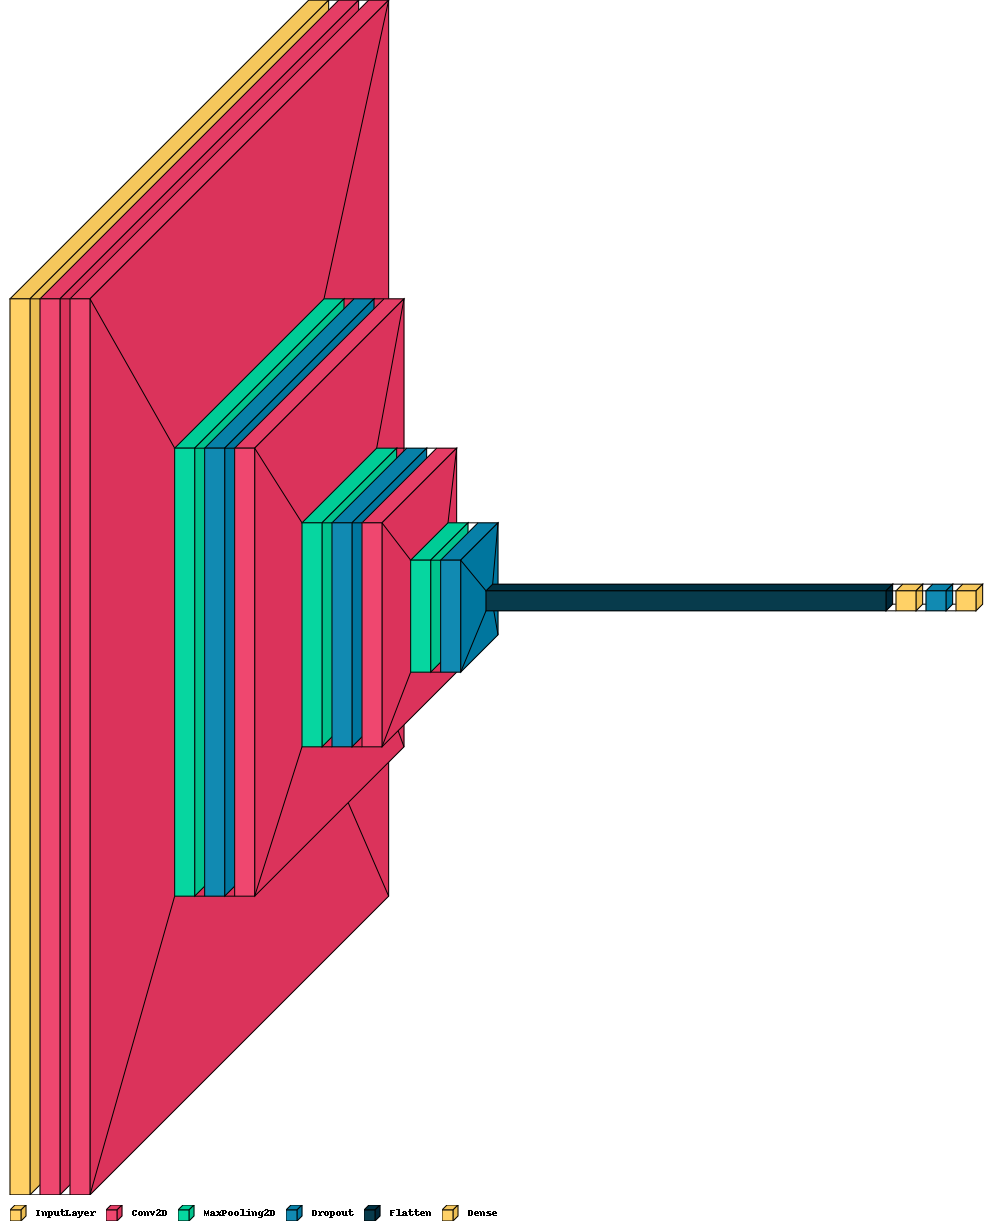

In [11]:
import visualkeras
visualkeras.layered_view(model, legend=True)

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss=binary_crossentropy, metrics=['accuracy'])

# Let's begin our training and show the accuracy we get after each epoch

In [ ]:
# start Train/Test
batch_size = 32
hist = model.fit(traindata, steps_per_epoch = traindata.samples//batch_size,
                 validation_data = testdata,validation_steps = testdata.samples//batch_size,
                 epochs = 10
                 )

Epoch 1/10
43/43 [==============================] - 221s 5s/step - loss: 0.5333 - accuracy: 0.8370 - val_loss: 0.2128 - val_accuracy: 0.9464
Epoch 2/10
43/43 [==============================] - 68s 2s/step - loss: 0.2149 - accuracy: 0.9269 - val_loss: 0.1928 - val_accuracy: 0.9219
Epoch 3/10
43/43 [==============================] - 68s 2s/step - loss: 0.1874 - accuracy: 0.9313 - val_loss: 0.1520 - val_accuracy: 0.9576
Epoch 4/10
43/43 [==============================] - 69s 2s/step - loss: 0.1380 - accuracy: 0.9569 - val_loss: 0.1085 - val_accuracy: 0.9643
Epoch 5/10
43/43 [==============================] - 68s 2s/step - loss: 0.1214 - accuracy: 0.9547 - val_loss: 0.1062 - val_accuracy: 0.9688
Epoch 6/10
43/43 [==============================] - 69s 2s/step - loss: 0.1290 - accuracy: 0.9510 - val_loss: 0.1388 - val_accuracy: 0.9487
Epoch 7/10
43/43 [==============================] - 68s 2s/step - loss: 0.1241 - accuracy: 0.9576 - val_loss: 0.0923 - val_accuracy: 0.9710
Epoch 8/10
43/43 [=

#Visualization for brevious results 
#####1- Loss VS Validation Loss
#####2- Accuracy VS Validation Accuracy

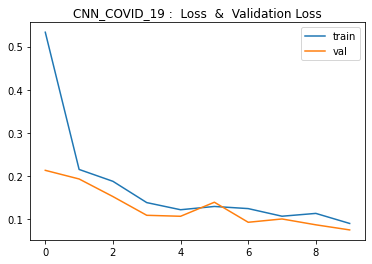

In [ ]:
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'val')
plt.title('CNN_COVID_19 :  Loss  &  Validation Loss')
plt.legend()
plt.show()

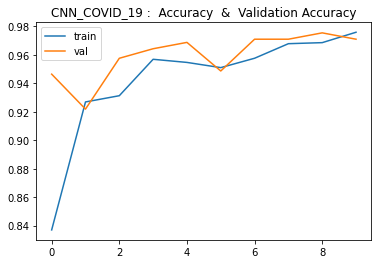

In [ ]:
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'val')
plt.title('CNN_COVID_19 :  Accuracy  &  Validation Accuracy')
plt.legend()
plt.show()

#Visualization of Confusion Matrix 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[[114 116]
 [113 117]]
classification_Report
              precision    recall  f1-score   support

      COVID+       0.50      0.50      0.50       230
      COVID-       0.50      0.51      0.51       230

    accuracy                           0.50       460
   macro avg       0.50      0.50      0.50       460
weighted avg       0.50      0.50      0.50       460



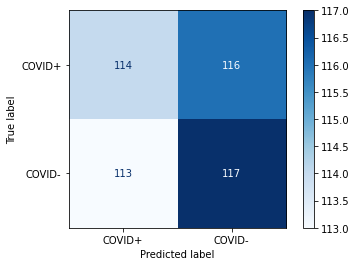

In [ ]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['COVID+', 'COVID-']
label_names = [0,1]

Y_pred = model.predict_generator(testdata)
y_pred = np.argmax(Y_pred ,  axis = 1)

cm = confusion_matrix(testdata.classes, y_pred, labels = label_names)


print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))

print('classification_Report')
print(classification_report(testdata.classes, y_pred, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format = 'g')
plt.show()


####This notebook made by:
    1-Ibrahim Ehab Abdelmaged
    2-Omar Khalid Elsayed
